In [19]:
# https://www.youtube.com/watch?v=7HPwo4wnJeA

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [21]:
dir(datasets)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_module_wrapper',
 '_sys',
 'boston_housing',
 'cifar10',
 'cifar100',
 'fashion_mnist',
 'imdb',
 'mnist',
 'reuters']

In [22]:
datasets.cifar10.load_data()

((array([[[[ 59,  62,  63],
           [ 43,  46,  45],
           [ 50,  48,  43],
           ...,
           [158, 132, 108],
           [152, 125, 102],
           [148, 124, 103]],
  
          [[ 16,  20,  20],
           [  0,   0,   0],
           [ 18,   8,   0],
           ...,
           [123,  88,  55],
           [119,  83,  50],
           [122,  87,  57]],
  
          [[ 25,  24,  21],
           [ 16,   7,   0],
           [ 49,  27,   8],
           ...,
           [118,  84,  50],
           [120,  84,  50],
           [109,  73,  42]],
  
          ...,
  
          [[208, 170,  96],
           [201, 153,  34],
           [198, 161,  26],
           ...,
           [160, 133,  70],
           [ 56,  31,   7],
           [ 53,  34,  20]],
  
          [[180, 139,  96],
           [173, 123,  42],
           [186, 144,  30],
           ...,
           [184, 148,  94],
           [ 97,  62,  34],
           [ 83,  53,  34]],
  
          [[177, 144, 116],
           [16

In [23]:
(X_train,y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [24]:
dir(plt)

['Annotation',
 'Arrow',
 'Artist',
 'AutoLocator',
 'Axes',
 'Button',
 'Circle',
 'Figure',
 'FigureCanvasBase',
 'FixedFormatter',
 'FixedLocator',
 'FormatStrFormatter',
 'Formatter',
 'FuncFormatter',
 'GridSpec',
 'IndexLocator',
 'Line2D',
 'LinearLocator',
 'Locator',
 'LogFormatter',
 'LogFormatterExponent',
 'LogFormatterMathtext',
 'LogLocator',
 'MaxNLocator',
 'MouseButton',
 'MultipleLocator',
 'Normalize',
 'NullFormatter',
 'NullLocator',
 'Number',
 'PolarAxes',
 'Polygon',
 'Rectangle',
 'ScalarFormatter',
 'Slider',
 'Subplot',
 'SubplotSpec',
 'Text',
 'TickHelper',
 'Widget',
 '_INSTALL_FIG_OBSERVER',
 '_IP_REGISTERED',
 '_IoffContext',
 '_IonContext',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_api',
 '_auto_draw_if_interactive',
 '_backend_mod',
 '_copy_docstring_and_deprecators',
 '_get_backend_mod',
 '_get_required_interactive_framework',
 '_interactive_bk',
 '_log',
 '_pylab_helpers',
 '_

In [25]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [26]:
y_train.shape

(50000, 1)

In [27]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [28]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [29]:
tr = y_train.reshape(-1,)

In [30]:
classes[9]

'truck'

In [31]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [32]:
X_test.shape

(10000, 32, 32, 3)

In [33]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

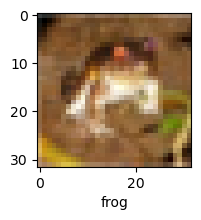

In [34]:
plot_sample(X_train, y_train, 0)

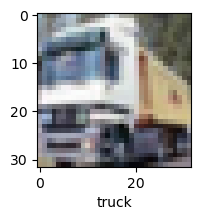

In [35]:
plot_sample(X_train, y_train, 1)

In [36]:
# To normalize to 1 from 0 range
X_train = X_train /255
X_test = X_test / 255

In [ ]:
# https://github.com/codebasics/deep-learning-keras-tf-tutorial/blob/master/16_cnn_cifar10_small_image_classification/cnn_cifar10_dataset.ipynb

In [37]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 50000 samples
Epoch 1/5
50000/50000 [==============================] - 143s 3ms/sample - loss: 1.8095 - acc: 0.3574
Epoch 2/5
50000/50000 [==============================] - 100s 2ms/sample - loss: 1.6251 - acc: 0.4277
Epoch 3/5
50000/50000 [==============================] - 124s 2ms/sample - loss: 1.5423 - acc: 0.4581
Epoch 4/5
50000/50000 [==============================] - 106s 2ms/sample - loss: 1.4828 - acc: 0.4764
Epoch 5/5
50000/50000 [==============================] - 127s 3ms/sample - loss: 1.4337 - acc: 0.4962


In [ ]:
# As we can see, accuracy of the ANN gives bad results. That's why
# it's not good idea to use ANN(Artificial neural network) for images

In [38]:
ann.evaluate(X_test, y_test)

10000/10000 [==============================] - 15s 1ms/sample - loss: 1.4963 - acc: 0.4623


[1.4962767467498779, 0.4623]

In [47]:
y_test.shape

(10000, 1)

In [48]:
X_test.shape

(10000, 32, 32, 3)

In [42]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classifiaction Report: \n", classification_report(y_test, y_pred_classes))


Classifiaction Report: 
               precision    recall  f1-score   support

           0       0.66      0.38      0.48      1000
           1       0.58      0.55      0.57      1000
           2       0.32      0.51      0.39      1000
           3       0.39      0.21      0.27      1000
           4       0.58      0.24      0.34      1000
           5       0.43      0.34      0.38      1000
           6       0.51      0.59      0.55      1000
           7       0.63      0.44      0.52      1000
           8       0.62      0.57      0.59      1000
           9       0.33      0.80      0.47      1000

    accuracy                           0.46     10000
   macro avg       0.51      0.46      0.46     10000
weighted avg       0.51      0.46      0.46     10000



In [49]:
# CNN

In [51]:
cnn = models.Sequential([
        # CNN figures out filters for me. I don't have to tell what the filters are
        # 
        layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (32,32,3)),
        layers.MaxPooling2D((2,2)),
    
        layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),
        layers.MaxPooling2D((2,2)),
        # cnn
        # dense
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

In [53]:
cnn.compile(optimizer = 'adam',
             loss= 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [54]:
cnn.fit(X_train, y_train, epochs=10)

Train on 50000 samples
Epoch 1/10
50000/50000 [==============================] - 120s 2ms/sample - loss: 1.4397 - acc: 0.4822
Epoch 2/10
50000/50000 [==============================] - 89s 2ms/sample - loss: 1.0830 - acc: 0.6221
Epoch 3/10
50000/50000 [==============================] - 75s 1ms/sample - loss: 0.9613 - acc: 0.6647
Epoch 4/10
50000/50000 [==============================] - 66s 1ms/sample - loss: 0.8727 - acc: 0.6966
Epoch 5/10
50000/50000 [==============================] - 58s 1ms/sample - loss: 0.8055 - acc: 0.7190
Epoch 6/10
50000/50000 [==============================] - 57s 1ms/sample - loss: 0.7529 - acc: 0.7382
Epoch 7/10
50000/50000 [==============================] - 91s 2ms/sample - loss: 0.7048 - acc: 0.7555
Epoch 8/10
50000/50000 [==============================] - 57s 1ms/sample - loss: 0.6631 - acc: 0.7691
Epoch 9/10
50000/50000 [==============================] - 56s 1ms/sample - loss: 0.6231 - acc: 0.78210s - loss: 0.6230 - acc: 0.7
Epoch 10/10
50000/50000 [=====

In [55]:
cnn.evaluate(X_test, y_test)

10000/10000 [==============================] - 7s 681us/sample - loss: 0.9236 - acc: 0.7047


[0.9235618158340454, 0.7047]

In [56]:
# Accuracy is pretty good for CNN

In [57]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [58]:
y_test = y_test.reshape(-1,)
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

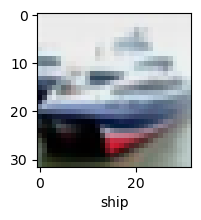

In [59]:
plot_sample(X_test, y_test,1)

In [69]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[5.0505787e-05, 5.9719951e-06, 6.3058711e-03, 9.6535927e-01,
        1.5859898e-04, 1.4435811e-02, 1.3188121e-02, 1.2363952e-05,
        4.8341480e-04, 5.9449686e-08],
       [5.8245822e-03, 3.5027775e-03, 1.0642126e-06, 3.3753231e-06,
        9.9930190e-08, 6.3181169e-08, 2.3795019e-08, 4.8925517e-09,
        9.9010205e-01, 5.6595478e-04],
       [1.5622160e-01, 4.0673593e-01, 1.2389894e-03, 1.3168112e-02,
        3.5429880e-04, 1.0014771e-03, 2.6696187e-04, 8.8750880e-04,
        3.9136121e-01, 2.8763974e-02],
       [9.7660756e-01, 4.8101461e-05, 1.7542535e-02, 1.8342527e-05,
        2.0569640e-04, 1.6939417e-06, 2.5356939e-04, 6.4095747e-07,
        5.3214431e-03, 1.7857847e-07],
       [6.0622507e-09, 2.7468408e-07, 3.9138864e-03, 2.1217118e-03,
        9.6598439e-02, 1.6173075e-05, 8.9734864e-01, 1.7514289e-08,
        8.8948343e-07, 1.5264200e-09]], dtype=float32)

In [70]:
np.argmax([5,12,167,1,2])

2

In [71]:
np.argmax(y_pred[0])

3

In [72]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 1, 0, 6]

In [73]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

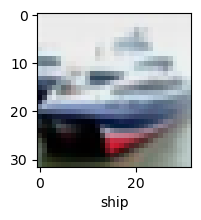

In [74]:
plot_sample(X_test, y_test, 1)

In [75]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [76]:
classes[y_classes[1]]

'ship'

# Handwritten digits

In [81]:
dir(datasets.mnist)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_module_wrapper',
 '_sys',
 'load_data']

In [157]:
(X_train, y_train),(X_test, y_test) = datasets.mnist.load_data()

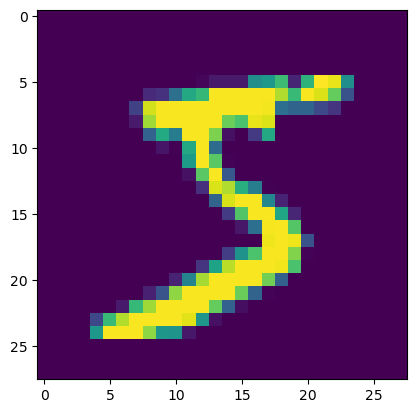

In [84]:
plt.imshow(X_train[0])

In [160]:
X_train.shape

(60000, 28, 28)

In [86]:
y_train.shape

(60000,)

In [88]:
y_train = y_train.reshape(-1,)

In [159]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [158]:
X_train = X_train /255
X_test = X_test / 255

In [90]:
dir(models)

['Model',
 'Sequential',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_module_wrapper',
 '_sys',
 'clone_model',
 'load_model',
 'model_from_config',
 'model_from_json',
 'model_from_yaml',
 'save_model']

In [93]:
help(models.Sequential)

Help on class Sequential in module tensorflow.python.keras.engine.sequential:

class Sequential(tensorflow.python.keras.engine.training.Model)
 |  Sequential(layers=None, name=None)
 |  
 |  Linear stack of layers.
 |  
 |  Arguments:
 |      layers: list of layers to add to the model.
 |  
 |  Example:
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = Sequential()
 |  model.add(Dense(32, input_shape=(500,)))
 |  # Afterwards, we do automatic shape inference:
 |  model.add(Dense(32))
 |  
 |  # This is identical to the following:
 |  model = Sequential()
 |  model.add(Dense(32, input_dim=500))
 |  
 |  # And to the following:
 |  model = Sequential()
 |  model.add(Dense(32, batch_input_shape=(None, 500)))
 |  
 |  # Note that you can also omit the `input_shape` argument:
 |  # In that case the model gets built the first time you call `fit` (or other
 |  # training and evaluation methods).
 |  model = Sequential()
 |  model.add(Dense

In [94]:
dir(layers)

['AbstractRNNCell',
 'Activation',
 'ActivityRegularization',
 'Add',
 'AdditiveAttention',
 'AlphaDropout',
 'Attention',
 'Average',
 'AveragePooling1D',
 'AveragePooling2D',
 'AveragePooling3D',
 'AvgPool1D',
 'AvgPool2D',
 'AvgPool3D',
 'BatchNormalization',
 'Bidirectional',
 'Concatenate',
 'Conv1D',
 'Conv2D',
 'Conv2DTranspose',
 'Conv3D',
 'Conv3DTranspose',
 'ConvLSTM2D',
 'Convolution1D',
 'Convolution2D',
 'Convolution2DTranspose',
 'Convolution3D',
 'Convolution3DTranspose',
 'Cropping1D',
 'Cropping2D',
 'Cropping3D',
 'CuDNNGRU',
 'CuDNNLSTM',
 'Dense',
 'DenseFeatures',
 'DepthwiseConv2D',
 'Dot',
 'Dropout',
 'ELU',
 'Embedding',
 'Flatten',
 'GRU',
 'GRUCell',
 'GaussianDropout',
 'GaussianNoise',
 'GlobalAveragePooling1D',
 'GlobalAveragePooling2D',
 'GlobalAveragePooling3D',
 'GlobalAvgPool1D',
 'GlobalAvgPool2D',
 'GlobalAvgPool3D',
 'GlobalMaxPool1D',
 'GlobalMaxPool2D',
 'GlobalMaxPool3D',
 'GlobalMaxPooling1D',
 'GlobalMaxPooling2D',
 'GlobalMaxPooling3D',
 'Inp

In [99]:
help(layers.Convolution2D)

Help on class Conv2D in module tensorflow.python.keras.layers.convolutional:

class Conv2D(Conv)
 |  Conv2D(filters, kernel_size, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)
 |  
 |  2D convolution layer (e.g. spatial convolution over images).
 |  
 |  This layer creates a convolution kernel that is convolved
 |  with the layer input to produce a tensor of
 |  outputs. If `use_bias` is True,
 |  a bias vector is created and added to the outputs. Finally, if
 |  `activation` is not `None`, it is applied to the outputs as well.
 |  
 |  When using this layer as the first layer in a model,
 |  provide the keyword argument `input_shape`
 |  (tuple of integers, does not include the sample axis),
 |  e.g. `input_shape=(128, 128, 3)` for 128x

In [104]:
help(layers.Flatten)

Help on class Flatten in module tensorflow.python.keras.layers.core:

class Flatten(tensorflow.python.keras.engine.base_layer.Layer)
 |  Flatten(data_format=None, **kwargs)
 |  
 |  Flattens the input. Does not affect the batch size.
 |  
 |  If inputs are shaped `(batch,)` without a channel dimension, then flattening
 |  adds an extra channel dimension and output shapes are `(batch, 1)`.
 |  
 |  Arguments:
 |    data_format: A string,
 |      one of `channels_last` (default) or `channels_first`.
 |      The ordering of the dimensions in the inputs.
 |      `channels_last` corresponds to inputs with shape
 |      `(batch, ..., channels)` while `channels_first` corresponds to
 |      inputs with shape `(batch, channels, ...)`.
 |      It defaults to the `image_data_format` value found in your
 |      Keras config file at `~/.keras/keras.json`.
 |      If you never set it, then it will be "channels_last".
 |  
 |  Example:
 |  
 |  ```python
 |  model = Sequential()
 |  model.add(Convol

In [105]:
help(layers.Dense)

Help on class Dense in module tensorflow.python.keras.layers.core:

class Dense(tensorflow.python.keras.engine.base_layer.Layer)
 |  Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)
 |  
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`).
 |  
 |  Note: If the input to the layer has a rank greater than 2, then
 |  it is flattened prior to the initial dot product with `kernel`.
 |  
 |  Example:
 |  
 |  ```python
 |  # as first layer in a sequential model:


In [179]:
cnn_2 = models.Sequential([
    layers.Convolution2D(filters = 5, kernel_size = (3,3),activation='relu', input_shape=(28, 28,1)),
    layers.MaxPooling2D((2,2)),
    
    layers.Convolution2D(filters = 5, kernel_size = (3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='sigmoid'),
])

In [180]:
cnn_2.compile(optimizer = 'adam',
             loss= 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [163]:
X_train.shape

(60000, 28, 28)

In [164]:
y_train.shape

(60000,)

In [125]:
# y_test = y_test.reshape(-1,)

In [126]:
# y_test.shape

(10000,)

In [165]:


X_train_reshaped = np.expand_dims(X_train, axis=-1)


In [166]:
X_train_reshaped.shape

(60000, 28, 28, 1)

In [167]:
X_train[34444][23]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00392157, 0.33333333, 1.        ,
       0.9372549 , 0.2       , 0.00784314, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

In [181]:
cnn_2.fit(X_train_reshaped, y_train ,epochs = 10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 27s 445us/sample - loss: 0.3053 - acc: 0.9050
Epoch 2/10
60000/60000 [==============================] - 27s 446us/sample - loss: 0.1227 - acc: 0.9620
Epoch 3/10
60000/60000 [==============================] - 30s 502us/sample - loss: 0.0966 - acc: 0.9704
Epoch 4/10
60000/60000 [==============================] - 28s 461us/sample - loss: 0.0812 - acc: 0.9749
Epoch 5/10
60000/60000 [==============================] - 23s 375us/sample - loss: 0.0708 - acc: 0.9783
Epoch 6/10
60000/60000 [==============================] - 23s 379us/sample - loss: 0.0623 - acc: 0.9809
Epoch 7/10
60000/60000 [==============================] - 23s 377us/sample - loss: 0.0536 - acc: 0.9830
Epoch 8/10
60000/60000 [==============================] - 22s 373us/sample - loss: 0.0485 - acc: 0.9847
Epoch 9/10
60000/60000 [==============================] - 23s 376us/sample - loss: 0.0439 - acc: 0.9857
Epoch 10/10
60000/60000 [================

In [169]:
X_test_reshaped = np.expand_dims(X_test, axis=-1)

In [171]:
X_test_reshaped.shape

(10000, 28, 28, 1)

In [172]:
y_test.shape

(10000,)

In [175]:
y_test_reshaped = np.expand_dims(y_test, axis=-1)

In [173]:
X_train_reshaped.shape

(60000, 28, 28, 1)

In [174]:
X_train.shape

(60000, 28, 28)

In [183]:
# From git of the guy

In [184]:
(X_train, y_train),(X_test, y_test) = datasets.mnist.load_data()

In [185]:


X_train = X_train.reshape(-1,28,28,1)
X_train.shape



(60000, 28, 28, 1)

In [186]:
X_test = X_test.reshape(-1,28,28,1)
X_test.shape

(10000, 28, 28, 1)

In [187]:
cnn_3 = models.Sequential([
    layers.Convolution2D(filters = 5, kernel_size = (3,3),activation='relu', input_shape=(28, 28,1)),
    layers.MaxPooling2D((2,2)),
    
    layers.Convolution2D(filters = 5, kernel_size = (3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='sigmoid'),
])

cnn_3.compile(optimizer = 'adam',
             loss= 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [189]:
cnn_3.fit(X_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 44s 729us/sample - loss: 0.7410 - acc: 0.7670
Epoch 2/5
60000/60000 [==============================] - 46s 768us/sample - loss: 0.1477 - acc: 0.9556
Epoch 3/5
60000/60000 [==============================] - 44s 739us/sample - loss: 0.1035 - acc: 0.9684
Epoch 4/5
60000/60000 [==============================] - 41s 685us/sample - loss: 0.0857 - acc: 0.9739
Epoch 5/5
60000/60000 [==============================] - 36s 598us/sample - loss: 0.0725 - acc: 0.9778


In [191]:
cnn_3.evaluate(X_test,y_test)

10000/10000 [==============================] - 4s 413us/sample - loss: 0.0753 - acc: 0.9773


[0.0753352636468131, 0.9773]